# Assignment: Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

# Objectives

Your main task is to cluster the countries by the factors mentioned above and then present your solution and recommendations to the CEO using a PPT. You are also supposed to use dimensionality reduction using PCA to get the visualisations of the clusters in a 2-D form. 

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#Reading Data Dictionary to understand variables in dataset
data_dict=pd.read_csv("C://Vikas//DS-UPGRAD-IIITB-2018-2019//Python//Unsupervised_Learning//Assignment//data-dictionary.csv")

In [3]:
data_dict

Column Name                                        Description
0     country                                Name of the country
1  child_mort  Death of children under 5 years of age per 100...
2     exports  Exports of goods and services. Given as %age o...
3      health         Total health spending as %age of Total GDP
4     imports  Imports of goods and services. Given as %age o...
5      Income                              Net income per person
6   Inflation  The measurement of the annual growth rate of t...
7  life_expec  The average number of years a new born child w...
8   total_fer  The number of children that would be born to e...
9        gdpp  The GDP per capita. Calculated as the Total GD...

In [4]:
#reading Dataset
helpint = pd.read_csv("C://Vikas//DS-UPGRAD-IIITB-2018-2019//Python//Unsupervised_Learning//Assignment//Country-data.csv")

In [5]:
helpint.columns #Checking for columns in dataset

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [6]:
helpint.head() #Checking the first five rows of dataset

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [7]:
#Sanity Check
helpint.shape #Checking the rows and columns in dataset

(167, 10)

In [8]:
helpint.describe() #Checking for descriptive statistics

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [9]:
helpint.info() #Checking for variable datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


# Checking for NULL and NaN values in the dataset

In [10]:
#Na Handling
helpint.isnull().values.any()

False

In [11]:
helpint.isnull().values.sum()

0

In [12]:
helpint.isnull().sum()*100/helpint.shape[0]

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

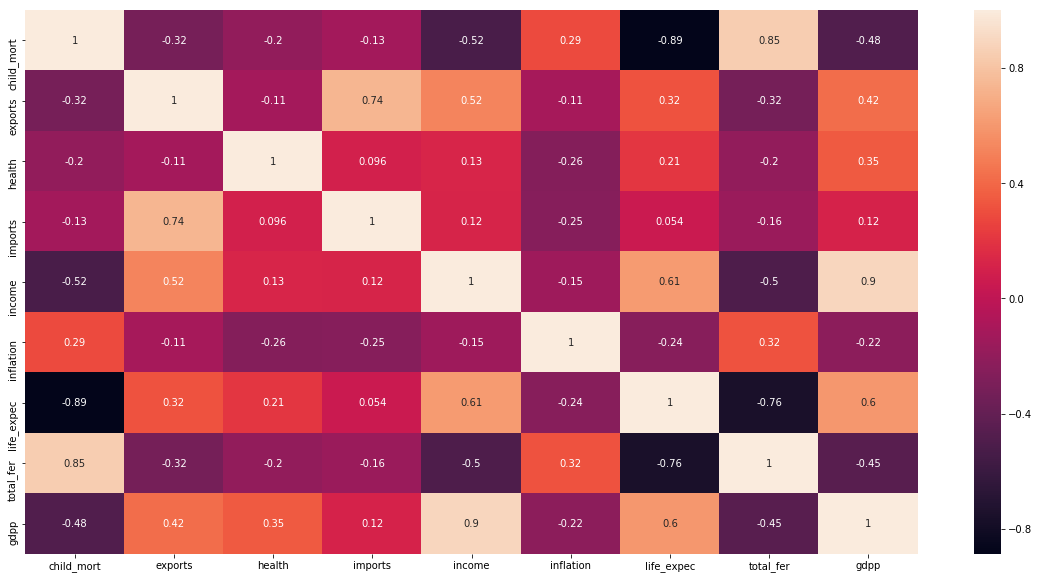

In [13]:
# Checking the correlation matrix to identify correlation between independent variables
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(helpint.corr(),annot = True)

In [14]:
helpint_bkp = helpint.copy() #Backing up the original dataset

In [15]:
helpint_bkp.shape #Verifying backup dataset

(167, 10)

# Proceeding with PCA

# Dropping Country Column as it is categorical variable as first step

In [16]:
helpint_pca = helpint.drop("country", axis='columns')

In [17]:
helpint_pca_bkp = helpint_pca.copy() #Taking backup before Scaling and Standardizing

In [18]:
helpint_pca.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

In [19]:
helpint_pca.shape

(167, 9)

# Standardizing data before running PCA

In [20]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
helpint_scaled = standard_scaler.fit_transform(helpint_pca) #Creating new dataframe helpint_scaled for scaled values

In [21]:
helpint_scaled.shape

(167, 9)

In [22]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [23]:
#Doing the PCA on the train data
pca.fit(helpint_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [24]:
pca.transform(helpint_scaled)

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [25]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [26]:
colnames = list(helpint_pca.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

PC1       PC2     Feature
0 -0.419519  0.192884  child_mort
1  0.283897  0.613163     exports
2  0.150838 -0.243087      health
3  0.161482  0.671821     imports
4  0.398441  0.022536      income

In [27]:
pcs_df

PC1       PC2     Feature
0 -0.419519  0.192884  child_mort
1  0.283897  0.613163     exports
2  0.150838 -0.243087      health
3  0.161482  0.671821     imports
4  0.398441  0.022536      income
5 -0.193173 -0.008404   inflation
6  0.425839 -0.222707  life_expec
7 -0.403729  0.155233   total_fer
8  0.392645 -0.046022        gdpp

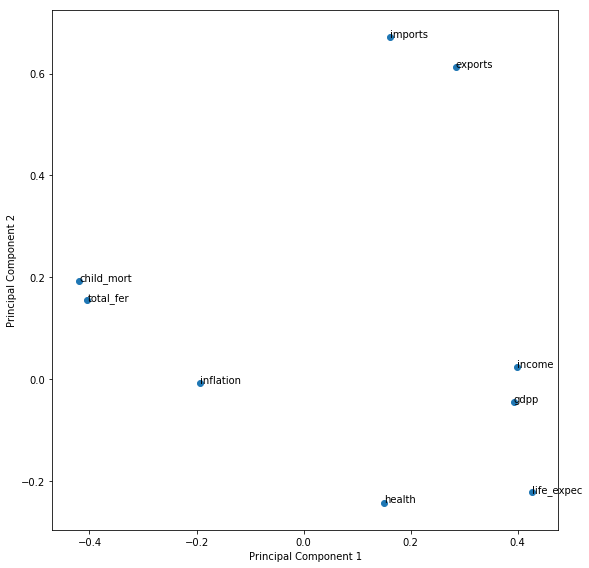

In [28]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [29]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

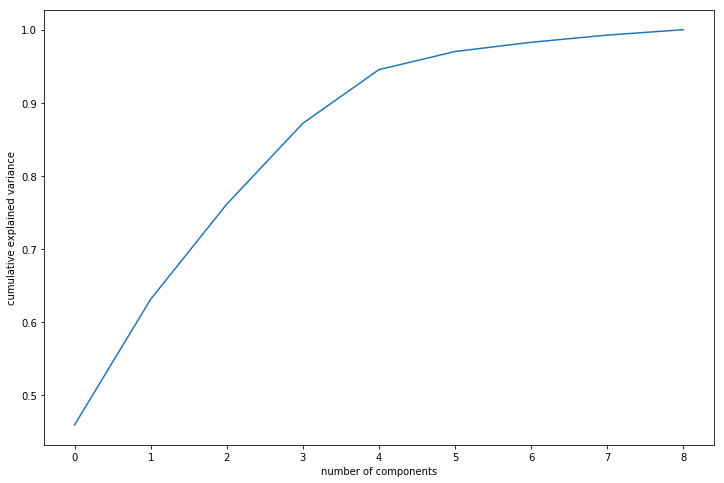

In [30]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# With Scree plot it is clearly visible that 5 principal components covers 95% of the variance in data, hence we choose 5 PCs in incremental PCA

In [31]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [32]:
pcs_df_final = pca_final.fit_transform(helpint_scaled)
pcs_df_final.shape

(167, 5)

In [33]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(pcs_df_final.transpose())

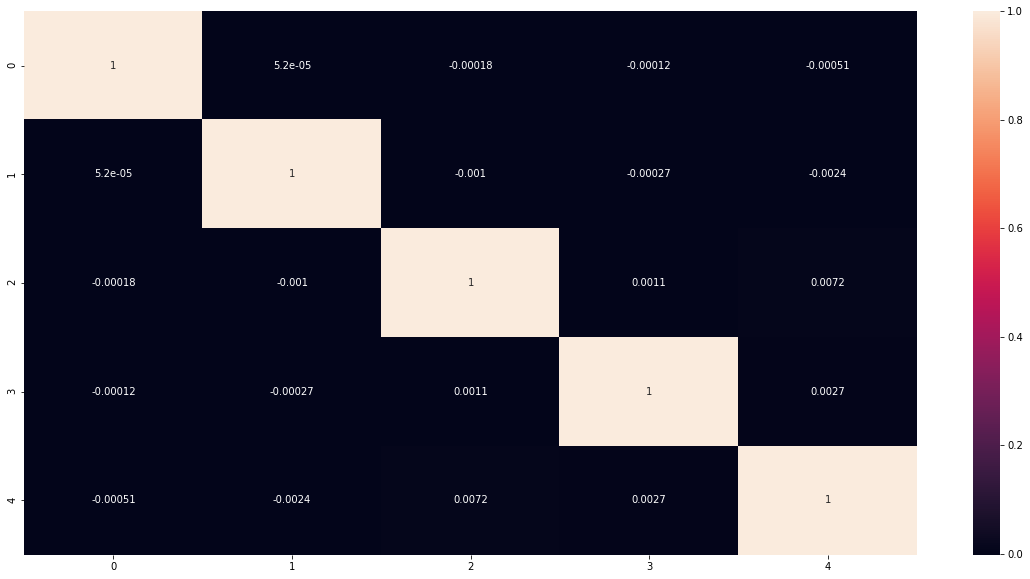

In [34]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [35]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.007194543060491425 , min corr:  -0.002374704497495838


In [36]:
#Creating dataframe for Principal Component and will be using this dataframe for clustering
principalDf = pd.DataFrame(data = pcs_df_final
             ,columns = ['Principal_Component_1', 'Principal_Component_2', 
                          'Principal_Component_3', 'Principal_Component_4',
                         'Principal_Component_5']) 

In [37]:
principalDf

Principal_Component_1  Principal_Component_2  Principal_Component_3  \
0                -2.913000               0.091969              -0.721242   
1                 0.429870              -0.589373              -0.328611   
2                -0.285289              -0.452139               1.232051   
3                -2.932714               1.698771               1.525076   
4                 1.033371               0.133853              -0.216699   
5                 0.022890              -1.772736               0.864500   
6                -0.101463              -0.567318               0.248107   
7                 2.342153              -1.989710               0.198795   
8                 2.973841              -0.735152              -0.528284   
9                -0.181303              -0.396895               0.868399   
10                1.268740              -0.658658              -0.484555   
11                1.671024               0.563934               0.997464   
12               -1.123979              -0.961083               0.542964   
13                1.081196              -0.484983              -0.658991   
14                0.580574               0.541405               0.471986   
15                3.143756               0.662482              -0.659855   
16                0.210908               0.695633              -0.261731   
17               -2.673005               0.411199              -0.237232   
18               -0.156696               0.776113              -0.279266   
19               -0.794151              -0.120997               0.414132   
20                0.995909              -0.974806              -1.534071   
21               -0.881576               0.460256              -0.602232   
22                0.141007              -2.149631              -0.169567   
23                2.460675               0.028279               3.022549   
24                0.906504               0.028728              -0.465601   
25               -3.122430               0.034132              -0.448309   
26               -2.898911              -0.426694              -1.360086   
27               -0.582622               0.892420              -0.494662   
28               -2.808332               0.073705              -0.327757   
29                2.543776              -1.727357              -0.401760   
..                     ...                    ...                    ...   
137              -1.191245              -0.553842              -0.730236   
138               1.918016              -0.427112               0.145716   
139               2.019143              -1.786179              -0.373238   
140              -0.575132              -0.989932               1.755726   
141               0.026671              -0.016991              -0.033020   
142              -2.319441              -0.767381               0.735848   
143               0.171654              -0.094243               0.016510   
144               2.818263              -0.915851              -0.101273   
145               4.088623              -0.429291              -0.276359   
146              -1.244377              -0.029404              -0.153758   
147              -2.554170              -0.217996              -0.077956   
148               0.925809               0.827979               0.352726   
149              -2.371889              -1.176966               0.392827   
150              -1.997994               0.952271              -1.217241   
151              -0.755117              -0.093367              -0.410624   
152               0.601940               0.171081              -0.234296   
153               0.401370              -1.412286               0.237246   
154              -0.464512               1.290702               0.618455   
155              -2.854881              -0.355787              -0.699311   
156               0.302728              -0.092996              -0.103870   
157               2.427491               1.159100    

In [38]:
#Backing up Principal Component Dataframe
principalDf_bkp = principalDf.copy()

In [39]:
principalDf_bkp.shape

(167, 5)

# Dealing with Outliers using Inter-Quartile Range(IQR) Method

In [40]:
Q1 = principalDf.quantile(0.25)
Q3 = principalDf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Principal_Component_1    2.606494
Principal_Component_2    1.301773
Principal_Component_3    0.942993
Principal_Component_4    1.511835
Principal_Component_5    0.679515
dtype: float64


In [41]:
#Removing outliers from the dataframe and creating new dataframe principalDf_final to be used for clustering
principalDf_final = principalDf[~((principalDf < (Q1 - 1.5 * IQR)) |(principalDf > (Q3 + 1.5 * IQR))).any(axis=1)]

In [42]:
#Creating new dataframe outliers_df to preserve outliers
outliers_df = principalDf[((principalDf < (Q1 - 1.5 * IQR)) |(principalDf > (Q3 + 1.5 * IQR))).any(axis=1)]

In [43]:
outliers_df.index

Int64Index([ 23,  31,  81,  82,  87,  88,  91,  98, 101, 102, 103, 113, 115,
            123, 128, 131, 133, 149, 159, 163],
           dtype='int64')

In [44]:
principalDf_final.shape

(147, 5)

In [45]:
principalDf_final.describe()

Principal_Component_1  Principal_Component_2  Principal_Component_3  \
count             147.000000             147.000000             147.000000   
mean               -0.097628              -0.127167              -0.075401   
std                 1.846416               0.973095               0.711345   
min                -4.408941              -2.438008              -1.534071   
25%                -1.382257              -0.802632              -0.491511   
50%                 0.018640              -0.105397              -0.235307   
75%                 1.167582               0.544051               0.334165   
max                 4.088623               2.372017               1.822990   

       Principal_Component_4  Principal_Component_5  
count             147.000000             147.000000  
mean               -0.103257              -0.074748  
std                 0.928072               0.537999  
min                -1.591559              -1.411854  
25%                -0.850325              -0.387000  
50%                -0.406709              -0.083981  
75%                 0.559589               0.207130  
max                 2.775929               1.156471

# Creating Box plot for all the principal components for verifying outliers after removal

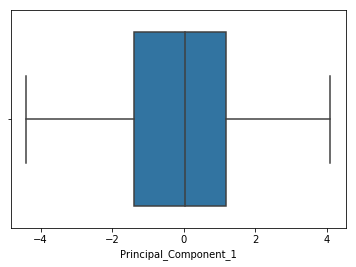

In [46]:
sns.boxplot(principalDf_final.Principal_Component_1)

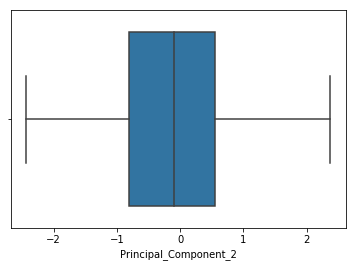

In [47]:
sns.boxplot(principalDf_final.Principal_Component_2)

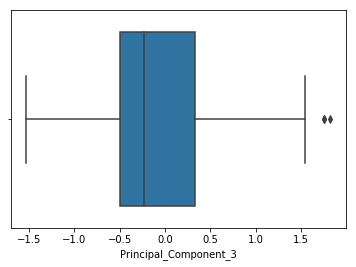

In [48]:
sns.boxplot(principalDf_final.Principal_Component_3)

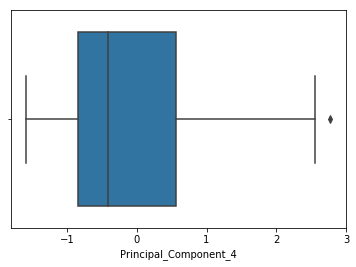

In [49]:
sns.boxplot(principalDf_final.Principal_Component_4)

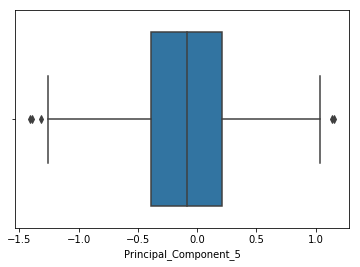

In [50]:
sns.boxplot(principalDf_final.Principal_Component_5)

In [51]:
principalDf_final.isnull().sum()

Principal_Component_1    0
Principal_Component_2    0
Principal_Component_3    0
Principal_Component_4    0
Principal_Component_5    0
dtype: int64

# K-Means Clustering

# Checking Hopkin Statistics

In [52]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [53]:
hopkins(principalDf_final)

0.7012695353980404

In [54]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(principalDf_final)
    sse_.append([k, silhouette_score(principalDf_final, kmeans.labels_)])

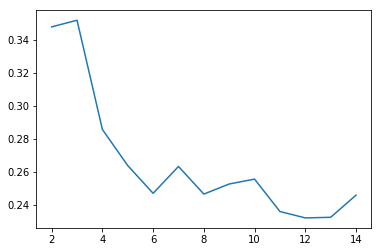

In [55]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [56]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(principalDf_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [57]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(principalDf_final)
    Sum_of_squared_distances.append(km.inertia_)

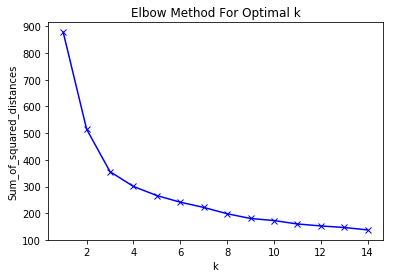

In [58]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# With above Sihlouetter Score graph and Elbow plot 4 clusters looks optimal number for clustering

In [59]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=50)
model_clus4.fit(principalDf_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [60]:
model_clus4.labels_

array([1, 3, 3, 1, 0, 3, 3, 2, 2, 3, 0, 0, 3, 0, 0, 2, 0, 1, 0, 3, 0, 1,
       3, 0, 1, 1, 0, 1, 2, 3, 1, 3, 3, 3, 1, 1, 1, 0, 1, 0, 0, 0, 2, 3,
       3, 3, 3, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 3, 3, 1, 1, 0, 1, 0,
       2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 3, 1, 3, 1, 3, 2, 2, 1, 2, 1, 0, 0, 3, 3, 0, 2,
       3, 3, 1, 3, 1, 0, 1, 0, 0, 0, 1, 0, 2, 3, 3, 1, 3, 2, 2, 3, 1, 0,
       1, 3, 0, 3, 3, 1, 0, 0, 2, 3, 3, 3, 0, 1, 1])

In [61]:
#Removing outliers from original dataframe helpint before concatenating to clusters
helpint_without_outliers = helpint.drop(outliers_df.index)

In [62]:
helpint_without_outliers.shape

(147, 10)

In [63]:
helpint_without_outliers

country  child_mort  exports  health  imports  \
0                       Afghanistan        90.2    10.00    7.58     44.9   
1                           Albania        16.6    28.00    6.55     48.6   
2                           Algeria        27.3    38.40    4.17     31.4   
3                            Angola       119.0    62.30    2.85     42.9   
4               Antigua and Barbuda        10.3    45.50    6.03     58.9   
5                         Argentina        14.5    18.90    8.10     16.0   
6                           Armenia        18.1    20.80    4.40     45.3   
7                         Australia         4.8    19.80    8.73     20.9   
8                           Austria         4.3    51.30   11.00     47.8   
9                        Azerbaijan        39.2    54.30    5.88     20.7   
10                          Bahamas        13.8    35.00    7.89     43.7   
11                          Bahrain         8.6    69.50    4.97     50.9   
12                       Bangladesh        49.4    16.00    3.52     21.8   
13                         Barbados        14.2    39.50    7.97     48.7   
14                          Belarus         5.5    51.40    5.61     64.5   
15                          Belgium         4.5    76.40   10.70     74.7   
16                           Belize        18.8    58.20    5.20     57.5   
17                            Benin       111.0    23.80    4.10     37.2   
18                           Bhutan        42.7    42.50    5.20     70.7   
19                          Bolivia        46.6    41.20    4.84     34.3   
20           Bosnia and Herzegovina         6.9    29.70   11.10     51.3   
21                         Botswana        52.5    43.60    8.30     51.3   
22                           Brazil        19.8    10.70    9.01     11.8   
24                         Bulgaria        10.8    50.20    6.87     53.0   
25                     Burkina Faso       116.0    19.20    6.74     29.6   
26                          Burundi        93.6     8.92   11.60     39.2   
27                         Cambodia        44.4    54.10    5.68     59.5   
28                         Cameroon       108.0    22.20    5.13     27.0   
29                           Canada         5.6    29.10   11.30     31.0   
30                       Cape Verde        26.5    32.70    4.09     61.8   
..                              ...         ...      ...     ...      ...   
134                 Slovak Republic         7.0    76.30    8.79     77.8   
135                        Slovenia         3.2    64.30    9.41     62.9   
136                 Solomon Islands        28.1    49.30    8.55     81.2   
137                    South Africa        53.7    28.60    8.94     27.4   
138                     South Korea         4.1    49.40    6.93     46.2   
139                           Spain         3.8    25.50    9.54     26.8   
140                       Sri Lanka        11.2    19.60    2.94     26.8   
141  St. Vincent and the Grenadines        20.7    26.90    4.47     57.1   
142                           Sudan        76.7    19.70    6.32     17.2   
143                        Suriname        24.1    52.50    7.01     38.4   
144                          Sweden         3.0    46.20    9.63     40.7   
145                     Switzerland         4.5    64.00   11.50     53.3   
146                      Tajikistan        52.4    14.90    5.98     58.6   
147                        Tanzania        71.9    18.70    6.01     29.1   
148                        Thailand        14.9    66.50    3.88     60.8   
150                            Togo        90.3    40.20    7.65     57.3   
151                           Tonga        17.4    12.40    5.07     60.3   
152                         Tunisia        17.4    50.50    6.21     55.3   
153                          Turkey        19.1    20.40    6.74     25.5   
154                    Turkmenistan        62.0    76.30    2.50     44.5   
155                     

In [64]:
outliers_df.index

Int64Index([ 23,  31,  81,  82,  87,  88,  91,  98, 101, 102, 103, 113, 115,
            123, 128, 131, 133, 149, 159, 163],
           dtype='int64')

In [65]:
#Concatenating Cluster labels with the original dataframe post removal of outliers to check which country falls
#in which cluster.
helpint_without_outliers.index = pd.RangeIndex(len(helpint_without_outliers.index))
helpint_without_outliers_km = pd.concat([helpint_without_outliers, pd.Series(model_clus4.labels_)], axis=1)
helpint_without_outliers_km.columns = ['country','child_mort','exports','health','imports','income',
                                       'inflation','life_expec','total_fer','gdpp','ClusterID']

In [66]:
helpint_without_outliers_km #Dataframe formed post concatenation and it does not contain outliers

country  child_mort  exports  health  imports  \
0                       Afghanistan        90.2    10.00    7.58     44.9   
1                           Albania        16.6    28.00    6.55     48.6   
2                           Algeria        27.3    38.40    4.17     31.4   
3                            Angola       119.0    62.30    2.85     42.9   
4               Antigua and Barbuda        10.3    45.50    6.03     58.9   
5                         Argentina        14.5    18.90    8.10     16.0   
6                           Armenia        18.1    20.80    4.40     45.3   
7                         Australia         4.8    19.80    8.73     20.9   
8                           Austria         4.3    51.30   11.00     47.8   
9                        Azerbaijan        39.2    54.30    5.88     20.7   
10                          Bahamas        13.8    35.00    7.89     43.7   
11                          Bahrain         8.6    69.50    4.97     50.9   
12                       Bangladesh        49.4    16.00    3.52     21.8   
13                         Barbados        14.2    39.50    7.97     48.7   
14                          Belarus         5.5    51.40    5.61     64.5   
15                          Belgium         4.5    76.40   10.70     74.7   
16                           Belize        18.8    58.20    5.20     57.5   
17                            Benin       111.0    23.80    4.10     37.2   
18                           Bhutan        42.7    42.50    5.20     70.7   
19                          Bolivia        46.6    41.20    4.84     34.3   
20           Bosnia and Herzegovina         6.9    29.70   11.10     51.3   
21                         Botswana        52.5    43.60    8.30     51.3   
22                           Brazil        19.8    10.70    9.01     11.8   
23                         Bulgaria        10.8    50.20    6.87     53.0   
24                     Burkina Faso       116.0    19.20    6.74     29.6   
25                          Burundi        93.6     8.92   11.60     39.2   
26                         Cambodia        44.4    54.10    5.68     59.5   
27                         Cameroon       108.0    22.20    5.13     27.0   
28                           Canada         5.6    29.10   11.30     31.0   
29                       Cape Verde        26.5    32.70    4.09     61.8   
..                              ...         ...      ...     ...      ...   
117                 Slovak Republic         7.0    76.30    8.79     77.8   
118                        Slovenia         3.2    64.30    9.41     62.9   
119                 Solomon Islands        28.1    49.30    8.55     81.2   
120                    South Africa        53.7    28.60    8.94     27.4   
121                     South Korea         4.1    49.40    6.93     46.2   
122                           Spain         3.8    25.50    9.54     26.8   
123                       Sri Lanka        11.2    19.60    2.94     26.8   
124  St. Vincent and the Grenadines        20.7    26.90    4.47     57.1   
125                           Sudan        76.7    19.70    6.32     17.2   
126                        Suriname        24.1    52.50    7.01     38.4   
127                          Sweden         3.0    46.20    9.63     40.7   
128                     Switzerland         4.5    64.00   11.50     53.3   
129                      Tajikistan        52.4    14.90    5.98     58.6   
130                        Tanzania        71.9    18.70    6.01     29.1   
131                        Thailand        14.9    66.50    3.88     60.8   
132                            Togo        90.3    40.20    7.65     57.3   
133                           Tonga        17.4    12.40    5.07     60.3   
134                         Tunisia        17.4    50.50    6.21     55.3   
135                          Turkey        19.1    20.40    6.74     25.5   
136                    Turkmenistan        62.0    76.30    2.50     44.5   
137                     

# Taking Aggregate of all the features in dataframe after grouping by Cluster ID

In [67]:
helpint_clusters_childmort = pd.DataFrame(helpint_without_outliers_km.groupby(["ClusterID"]).child_mort.mean())

In [68]:
helpint_clusters_exports = pd.DataFrame(helpint_without_outliers_km.groupby(["ClusterID"]).exports.mean())

In [69]:
helpint_clusters_health = pd.DataFrame(helpint_without_outliers_km.groupby(["ClusterID"]).health.mean())

In [70]:
helpint_clusters_imports = pd.DataFrame(helpint_without_outliers_km.groupby(["ClusterID"]).imports.mean())

In [71]:
helpint_clusters_income = pd.DataFrame(helpint_without_outliers_km.groupby(["ClusterID"]).income.mean())

In [72]:
helpint_clusters_inflation = pd.DataFrame(helpint_without_outliers_km.groupby(["ClusterID"]).inflation.mean())

In [73]:
helpint_clusters_life_expec = pd.DataFrame(helpint_without_outliers_km.groupby(["ClusterID"]).life_expec.mean())

In [74]:
helpint_clusters_total_fer = pd.DataFrame(helpint_without_outliers_km.groupby(["ClusterID"]).total_fer.mean())

In [75]:
helpint_clusters_gdpp = pd.DataFrame(helpint_without_outliers_km.groupby(["ClusterID"]).gdpp.mean())

In [76]:
#Creating dataframe to contain aggregated values calculated above with the cluster ID

df = pd.concat([pd.Series([0,1,2,3]), helpint_clusters_childmort, helpint_clusters_exports, 
                helpint_clusters_health, helpint_clusters_imports, helpint_clusters_income,
                helpint_clusters_inflation, helpint_clusters_life_expec, helpint_clusters_total_fer,
                helpint_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "ChildMort_mean", "Exports_mean", "health_mean",
             "imports_mean", "income_mean", "inflation_mean", "lifeExpec_mean",
             "totalfer_mean","gdpp_mean"]
df.head()

ClusterID  ChildMort_mean  Exports_mean  health_mean  imports_mean  \
0          0       14.137209     54.132558     6.937674     60.155814   
1          1       93.475000     30.490250     5.987000     40.247500   
2          2        4.159091     42.018182    10.177727     39.268182   
3          3       27.790476     28.537833     5.520714     34.308712   

    income_mean  inflation_mean  lifeExpec_mean  totalfer_mean     gdpp_mean  
0  16841.860465        4.376116       74.374419       1.983488  10157.116279  
1   3997.375000       10.116875       59.187500       5.034500   1912.225000  
2  39850.000000        1.340136       80.990909       1.805455  45281.818182  
3  10114.523810        8.606929       72.123810       2.533810   5023.000000

# Plotting Bar-graphs for all aggregated(mean) values against Cluster ID

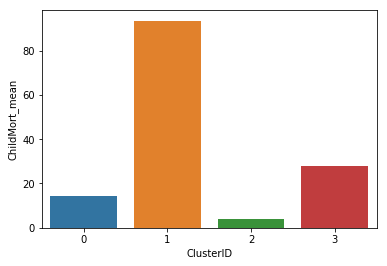

In [77]:
sns.barplot(x=df.ClusterID, y=df.ChildMort_mean)

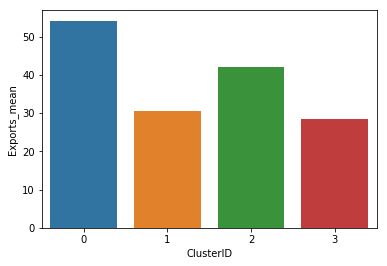

In [78]:
sns.barplot(x=df.ClusterID, y=df.Exports_mean)

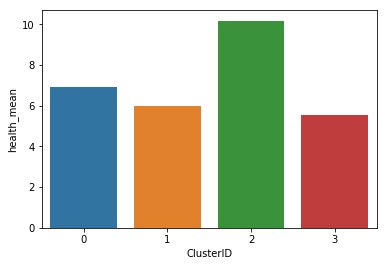

In [79]:
sns.barplot(x=df.ClusterID, y=df.health_mean)

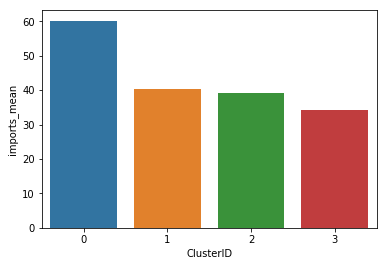

In [80]:
sns.barplot(x=df.ClusterID, y=df.imports_mean)

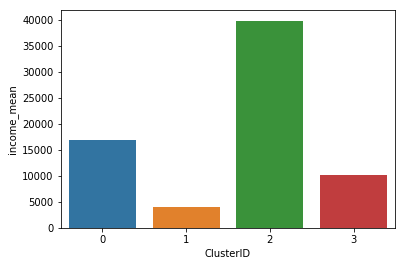

In [81]:
sns.barplot(x=df.ClusterID, y=df.income_mean)

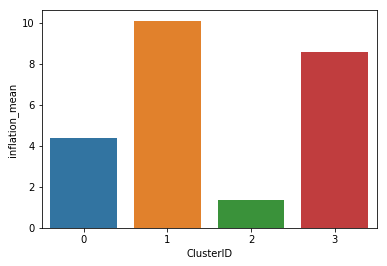

In [82]:
sns.barplot(x=df.ClusterID, y=df.inflation_mean)

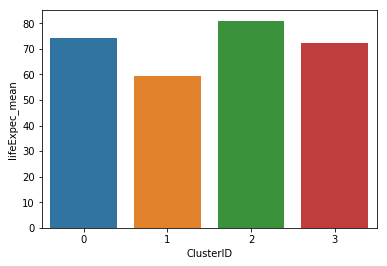

In [83]:
sns.barplot(x=df.ClusterID, y=df.lifeExpec_mean)

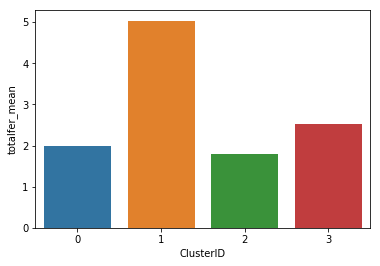

In [84]:
sns.barplot(x=df.ClusterID, y=df.totalfer_mean)

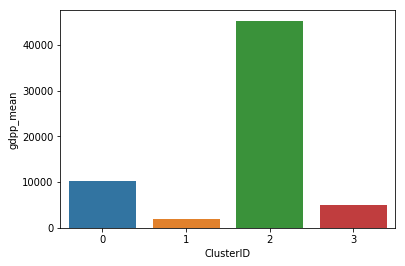

In [85]:
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)

# Hierarchical Clustering

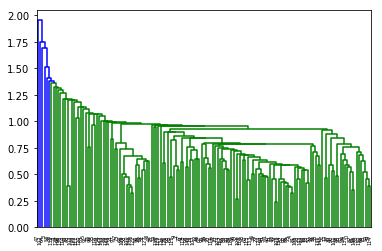

<Figure size 864x576 with 0 Axes>

In [86]:
# heirarchical clustering
mergings = linkage(principalDf_final, method = "single", metric='euclidean')
dendrogram(mergings)
fig = plt.figure(figsize = (12,8))
plt.show()

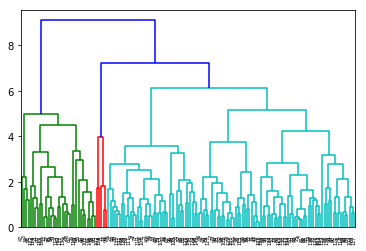

<Figure size 2160x2160 with 0 Axes>

In [87]:
# heirarchical clustering
mergings = linkage(principalDf_final, method = "complete", metric='euclidean')
dendrogram(mergings)
fig = plt.figure(figsize = (30,30))
plt.show()

With above dendrogram we see that if we draw a line horizontally or parallel to x-axis the line will have 
4 intersection points with dendrogram and it will cover all features, thus we choose clusters to be 4

In [88]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
helpint_without_outliers_hc = pd.concat([helpint_without_outliers, clusterCut], axis=1)
helpint_without_outliers_hc.columns = ['country','child_mort','exports','health','imports','income',
                                       'inflation','life_expec','total_fer','gdpp','ClusterID']

In [89]:
helpint_without_outliers_hc #Dataframe post concatenating with cluster labels and without outliers.

country  child_mort  exports  health  imports  \
0                       Afghanistan        90.2    10.00    7.58     44.9   
1                           Albania        16.6    28.00    6.55     48.6   
2                           Algeria        27.3    38.40    4.17     31.4   
3                            Angola       119.0    62.30    2.85     42.9   
4               Antigua and Barbuda        10.3    45.50    6.03     58.9   
5                         Argentina        14.5    18.90    8.10     16.0   
6                           Armenia        18.1    20.80    4.40     45.3   
7                         Australia         4.8    19.80    8.73     20.9   
8                           Austria         4.3    51.30   11.00     47.8   
9                        Azerbaijan        39.2    54.30    5.88     20.7   
10                          Bahamas        13.8    35.00    7.89     43.7   
11                          Bahrain         8.6    69.50    4.97     50.9   
12                       Bangladesh        49.4    16.00    3.52     21.8   
13                         Barbados        14.2    39.50    7.97     48.7   
14                          Belarus         5.5    51.40    5.61     64.5   
15                          Belgium         4.5    76.40   10.70     74.7   
16                           Belize        18.8    58.20    5.20     57.5   
17                            Benin       111.0    23.80    4.10     37.2   
18                           Bhutan        42.7    42.50    5.20     70.7   
19                          Bolivia        46.6    41.20    4.84     34.3   
20           Bosnia and Herzegovina         6.9    29.70   11.10     51.3   
21                         Botswana        52.5    43.60    8.30     51.3   
22                           Brazil        19.8    10.70    9.01     11.8   
23                         Bulgaria        10.8    50.20    6.87     53.0   
24                     Burkina Faso       116.0    19.20    6.74     29.6   
25                          Burundi        93.6     8.92   11.60     39.2   
26                         Cambodia        44.4    54.10    5.68     59.5   
27                         Cameroon       108.0    22.20    5.13     27.0   
28                           Canada         5.6    29.10   11.30     31.0   
29                       Cape Verde        26.5    32.70    4.09     61.8   
..                              ...         ...      ...     ...      ...   
117                 Slovak Republic         7.0    76.30    8.79     77.8   
118                        Slovenia         3.2    64.30    9.41     62.9   
119                 Solomon Islands        28.1    49.30    8.55     81.2   
120                    South Africa        53.7    28.60    8.94     27.4   
121                     South Korea         4.1    49.40    6.93     46.2   
122                           Spain         3.8    25.50    9.54     26.8   
123                       Sri Lanka        11.2    19.60    2.94     26.8   
124  St. Vincent and the Grenadines        20.7    26.90    4.47     57.1   
125                           Sudan        76.7    19.70    6.32     17.2   
126                        Suriname        24.1    52.50    7.01     38.4   
127                          Sweden         3.0    46.20    9.63     40.7   
128                     Switzerland         4.5    64.00   11.50     53.3   
129                      Tajikistan        52.4    14.90    5.98     58.6   
130                        Tanzania        71.9    18.70    6.01     29.1   
131                        Thailand        14.9    66.50    3.88     60.8   
132                            Togo        90.3    40.20    7.65     57.3   
133                           Tonga        17.4    12.40    5.07     60.3   
134                         Tunisia        17.4    50.50    6.21     55.3   
135                          Turkey        19.1    20.40    6.74     25.5   
136                    Turkmenistan        62.0    76.30    2.50     44.5   
137                     

In [90]:
helpint_without_outliers_hc.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
ClusterID     0
dtype: int64

# Taking Aggregate of all the features in dataframe after grouping by Cluster ID

In [91]:
helpint_hc_childmort = pd.DataFrame(helpint_without_outliers_hc.groupby(["ClusterID"]).child_mort.mean())

In [92]:
helpint_hc_exports = pd.DataFrame(helpint_without_outliers_hc.groupby(["ClusterID"]).exports.mean())

In [93]:
helpint_hc_health = pd.DataFrame(helpint_without_outliers_hc.groupby(["ClusterID"]).health.mean())

In [94]:
helpint_hc_imports = pd.DataFrame(helpint_without_outliers_hc.groupby(["ClusterID"]).imports.mean())

In [95]:
helpint_hc_income = pd.DataFrame(helpint_without_outliers_hc.groupby(["ClusterID"]).income.mean())

In [96]:
helpint_hc_inflation = pd.DataFrame(helpint_without_outliers_hc.groupby(["ClusterID"]).inflation.mean())

In [97]:
helpint_hc_life_expec = pd.DataFrame(helpint_without_outliers_hc.groupby(["ClusterID"]).life_expec.mean())

In [98]:
helpint_hc_total_fer = pd.DataFrame(helpint_without_outliers_hc.groupby(["ClusterID"]).total_fer.mean())

In [99]:
helpint_hc_gdpp = pd.DataFrame(helpint_without_outliers_hc.groupby(["ClusterID"]).gdpp.mean())

In [100]:
#Creating dataframe to contain aggregated values calculated above with the cluster ID

df_hc = pd.concat([pd.Series([0,1,2,3]), helpint_hc_childmort, helpint_hc_exports, 
                helpint_hc_health, helpint_hc_imports, helpint_hc_income,
                helpint_hc_inflation, helpint_hc_life_expec, helpint_hc_total_fer,
                helpint_hc_gdpp], axis=1)
df_hc.columns = ["ClusterID", "ChildMort_mean", "Exports_mean", "health_mean",
             "imports_mean", "income_mean", "inflation_mean", "lifeExpec_mean",
             "totalfer_mean","gdpp_mean"]
df_hc.head()

ClusterID  ChildMort_mean  Exports_mean  health_mean  imports_mean  \
0          0       97.190909     31.918788     6.506364     43.627273   
1          1       36.785000     26.096975     5.282750     30.024147   
2          2       13.130435     46.637681     7.460725     51.510145   
3          3        4.180000     71.020000    10.554000     61.320000   

    income_mean  inflation_mean  lifeExpec_mean  totalfer_mean     gdpp_mean  
0   3766.515152        8.927121       58.142424       5.197273   1874.363636  
1   9298.250000       11.137250       70.727500       2.799750   4288.525000  
2  20859.130435        3.448725       75.717391       2.031014  17119.072464  
3  50020.000000        1.155000       80.860000       1.834000  61160.000000

# Creating Bar Plots for mean values of each feature

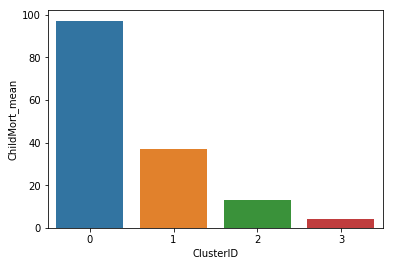

In [102]:
sns.barplot(x=df_hc.ClusterID, y=df_hc.ChildMort_mean)

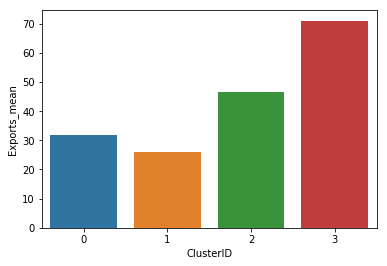

In [103]:
sns.barplot(x=df_hc.ClusterID, y=df_hc.Exports_mean)

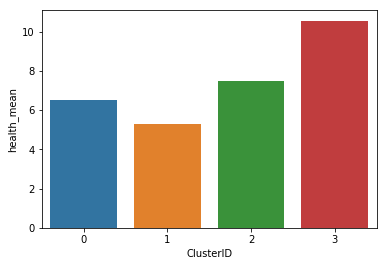

In [104]:
sns.barplot(x=df_hc.ClusterID, y=df_hc.health_mean)

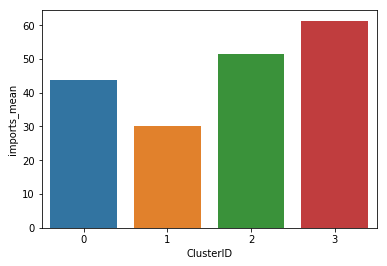

In [105]:
sns.barplot(x=df_hc.ClusterID, y=df_hc.imports_mean)

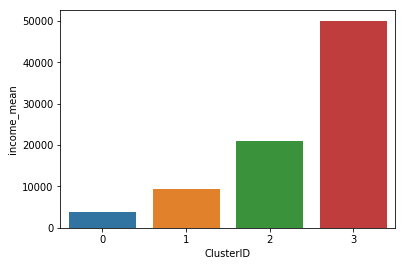

In [106]:
sns.barplot(x=df_hc.ClusterID, y=df_hc.income_mean)

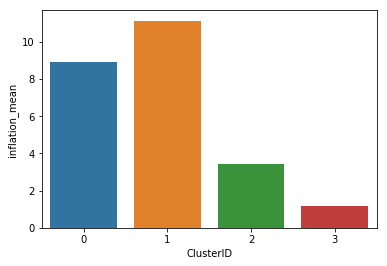

In [107]:
sns.barplot(x=df_hc.ClusterID, y=df_hc.inflation_mean)

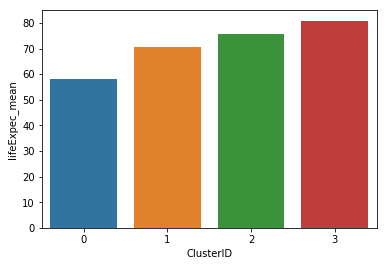

In [108]:
sns.barplot(x=df_hc.ClusterID, y=df_hc.lifeExpec_mean)

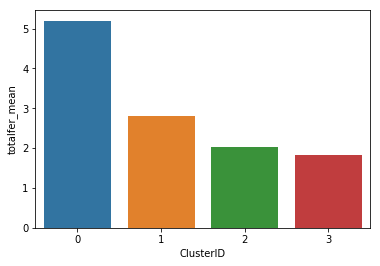

In [109]:
sns.barplot(x=df_hc.ClusterID, y=df_hc.totalfer_mean)

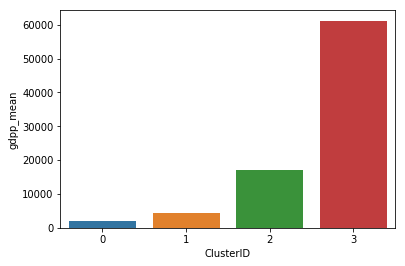

In [110]:
sns.barplot(x=df_hc.ClusterID, y=df_hc.gdpp_mean)